<a href="https://colab.research.google.com/github/GugaKunkel/DeepLearning/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a
href="https://colab.research.google.com/github/wingated/cs474_labs_f2019/blob/master/DL_Lab6.ipynb"
  target="_parent">
  <img
    src="https://colab.research.google.com/assets/colab-badge.svg"
    alt="Open In Colab"/>
</a>

# Lab 6: Sequence-to-sequence models

### Description:
For this lab, you will code up the [char-rnn model of Karpathy](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). This is a recurrent neural network that is trained probabilistically on sequences of characters, and that can then be used to sample new sequences that are like the original.

This lab will help you develop several new skills, as well as understand some best practices needed for building large models. In addition, we'll be able to create networks that generate neat text!

### Deliverable:
- Fill in the code for the RNN (using PyTorch's built-in GRU).
- Fill in the training loop
- Fill in the evaluation loop. In this loop, rather than using a validation set, you will sample text from the RNN.
- Implement your own GRU cell.
- Train your RNN on a new domain of text (Star Wars, political speeches, etc. - have fun!)

### Grading Standards:
- 20% Implementation the RNN
- 20% Implementation training loop
- 20% Implementation of evaluation loop
- 20% Implementation of your own GRU cell
- 20% Training of your RNN on a domain of your choice

### Tips:
- Read through all the helper functions, run them, and make sure you understand what they are doing
- At each stage, ask yourself: What should the dimensions of this tensor be? Should its data type be float or int? (int is called `long` in PyTorch)
- Don't apply a softmax inside the RNN if you are using an nn.CrossEntropyLoss (this module already applies a softmax to its input).

### Example Output:
An example of my final samples are shown below (more detail in the
final section of this writeup), after 150 passes through the data.
Please generate about 15 samples for each dataset.

<code>
And ifte thin forgision forward thene over up to a fear not your
And freitions, which is great God. Behold these are the loss sub
And ache with the Lord hath bloes, which was done to the holy Gr
And appeicis arm vinimonahites strong in name, to doth piseling
And miniquithers these words, he commanded order not; neither sa
And min for many would happine even to the earth, to said unto m
And mie first be traditions? Behold, you, because it was a sound
And from tike ended the Lamanites had administered, and I say bi
</code>


---

## Part 0: Readings, data loading, and high level training

---

There is a tutorial here that will help build out scaffolding code, and get an understanding of using sequences in pytorch.

* Read the following

> * [Pytorch sequence-to-sequence tutorial](https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html) (You will be implementing the decoder, not the encoder, as we are not doing sequence-to-sequence translation.)
> * [Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)






In [1]:
! wget -O ./text_files.tar.gz 'https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz'
! tar -xzf text_files.tar.gz
! pip install unidecode
! pip install torch

--2024-02-17 21:46:44--  https://piazza.com/redirect/s3?bucket=uploads&prefix=attach%2Fjlifkda6h0x5bk%2Fhzosotq4zil49m%2Fjn13x09arfeb%2Ftext_files.tar.gz
Resolving piazza.com (piazza.com)... 23.22.156.213, 44.216.95.21, 3.215.61.73, ...
Connecting to piazza.com (piazza.com)|23.22.156.213|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-uploads.piazza.com/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz [following]
--2024-02-17 21:46:44--  https://cdn-uploads.piazza.com/attach/jlifkda6h0x5bk/hzosotq4zil49m/jn13x09arfeb/text_files.tar.gz
Resolving cdn-uploads.piazza.com (cdn-uploads.piazza.com)... 13.249.141.11, 13.249.141.26, 13.249.141.91, ...
Connecting to cdn-uploads.piazza.com (cdn-uploads.piazza.com)|13.249.141.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1533290 (1.5M) [application/x-gzip]
Saving to: ‘./text_files.tar.gz’

./text_files.tar.gz 100%[===================>]   1.46M  --.-KB/s   

In [2]:
import unidecode
import string
import random

all_characters = string.printable
n_characters = len(all_characters)
file = unidecode.unidecode(open('./text_files/lotr.txt').read())
file_len = len(file)
print('file_len =', file_len)

file_len = 2579888


In [3]:
chunk_len = 200

def random_chunk():
  start_index = random.randint(0, file_len - chunk_len)
  end_index = start_index + chunk_len + 1
  return file[start_index:end_index]

print(random_chunk())

dows between two great arms of the mountains, above which three white 
peaks were shining: Celebdil, Fanuidhol, Caradhras. the Mountains of Moria. 
At the head of the glen a torrent flowed like a white


In [4]:
import torch
# Turn string into list of longs
def char_tensor(string):
  tensor = torch.zeros(len(string)).long()
  for c in range(len(string)):
      tensor[c] = all_characters.index(string[c])
  return tensor

print(char_tensor('abcDEF'))

tensor([10, 11, 12, 39, 40, 41])


---

## Part 4: Creating your own GRU cell

**(Come back to this later - its defined here so that the GRU will be defined before it is used)**

---

The cell that you used in Part 1 was a pre-defined Pytorch layer. Now, write your own GRU class using the same parameters as the built-in Pytorch class does.

Please do not look at the documentation's code for the GRU cell definition. The answer is right there in the code, and in theory, you could just cut-and-paste it. This bit is on your honor!

**TODO:**
* Create a custom GRU cell

**DONE:**



In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GRUCell(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(GRUCell, self).__init__()

    self.Wxr = nn.Parameter(torch.Tensor(input_size, hidden_size))
    nn.init.xavier_uniform_(self.Wxr)
    self.bxr = nn.Parameter(torch.zeros(hidden_size))
    self.Whr = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
    nn.init.xavier_uniform_(self.Whr)
    self.bhr = nn.Parameter(torch.zeros(hidden_size))
    self.Wxz = nn.Parameter(torch.Tensor(input_size, hidden_size))
    nn.init.xavier_uniform_(self.Wxz)
    self.bxz = nn.Parameter(torch.zeros(hidden_size))
    self.Whz = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
    nn.init.xavier_uniform_(self.Whz)
    self.bhz = nn.Parameter(torch.zeros(hidden_size))
    self.Wxn = nn.Parameter(torch.Tensor(input_size, hidden_size))
    nn.init.xavier_uniform_(self.Wxn)
    self.bxn = nn.Parameter(torch.zeros(hidden_size))
    self.Whn = nn.Parameter(torch.Tensor(hidden_size, hidden_size))
    nn.init.xavier_uniform_(self.Whn)
    self.bhn = nn.Parameter(torch.zeros(hidden_size))
    self.linear = nn.Linear(hidden_size, hidden_size)


  def forward(self, inputs, hidden):
    rt = torch.sigmoid(torch.matmul(inputs, self.Wxr)+ self.bxr + torch.matmul(hidden, self.Whr) + self.bhr)
    zt = torch.sigmoid(torch.matmul(inputs, self.Wxz)+ self.bxz + torch.matmul(hidden, self.Whz) + self.bhz)
    nt = torch.tanh(torch.matmul(inputs, self.Wxn) + self.bxn + (rt  * (torch.matmul(hidden, self.Whn) + self.bhn)) )
    ht = ((1 - zt) * nt) + (zt * hidden)
    outputs = self.linear(ht)
    return outputs, ht


class GRU(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(GRU, self).__init__()

    self.num_layers = num_layers
    self.layers = nn.ModuleList([GRUCell(input_size if i == 0 else hidden_size, hidden_size) for i in range(num_layers)])


  def forward(self, inputs, hidden):
    new_hidden = []
    for i, layer in enumerate(self.layers):
      out, h = layer(inputs, hidden[i])
      new_hidden.append(h)
      input = out
    new_hidden = torch.stack(new_hidden)
    return out, new_hidden

---

##  Part 1: Building a sequence to sequence model

---

Great! We have the data in a useable form. We can switch out which text file we are reading from, and trying to simulate.

We now want to build out an RNN model, in this section, we will use all built in Pytorch pieces when building our RNN class.


**TODO:**
* Create an RNN class that extends from nn.Module.

**DONE:**



In [6]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, n_layers=1):
    super(RNN, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers

    # more stuff here...
    self.linear = nn.Linear(hidden_size, output_size)
    self.embedding = nn.Embedding(self.output_size, self.hidden_size)
    self.gru = GRU(hidden_size, hidden_size, num_layers=n_layers)
    # self.gru = nn.GRU(hidden_size, hidden_size, num_layers=n_layers, batch_first=True)

  def forward(self, input_char, hidden):
    # by reviewing the documentation, construct a forward function that properly uses the output
    # of the GRU
    embedding = self.embedding(input_char).view(1,1,-1)
    output, hidden = self.gru(embedding, hidden)
    out_decoded = F.relu(self.linear(output))
    return out_decoded, hidden

  def init_hidden(self):
    return torch.zeros(self.n_layers, 1, self.hidden_size)

In [7]:
def random_training_set():
  chunk = random_chunk()
  inp = char_tensor(chunk[:-1])
  target = char_tensor(chunk[1:])
  return inp, target

---

## Part 2: Sample text and Training information

---

We now want to be able to train our network, and sample text after training.

This function outlines how training a sequence style network goes.

**TODO:**
* Fill in the pieces.

**DONE:**




In [12]:
# NOTE: decoder_optimizer, decoder, and criterion will be defined below as global variables
def train(inp, target):
    decoder_optimizer.zero_grad()
    hidden = decoder.init_hidden()
    loss = 0

    for char_in, char_target in zip(inp, target):
        char_decoded, hidden = decoder(char_in, hidden)
        loss += criterion(char_decoded.squeeze(0), char_target.unsqueeze(0))

    loss.backward()
    decoder_optimizer.step()
    return loss.item() / len(inp)

---

## Part 3: Sample text and Training information

---

You can at this time, if you choose, also write out your train loop boilerplate that samples random sequences and trains your RNN. This will be helpful to have working before writing your own GRU class.

If you are finished training, or during training, and you want to sample from the network you may consider using the following function. If your RNN model is instantiated as `decoder`then this will probabilistically sample a sequence of length `predict_len`

**TODO:**
* Fill out the evaluate function to generate text frome a primed string

**DONE:**



In [9]:
def sample_outputs(output, temperature):
    """Takes in a vector of unnormalized probability weights and samples a character from the distribution"""
    # As temperature approaches 0, this sampling function becomes argmax (no randomness)
    # As temperature approaches infinity, this sampling function becomes a purely random choice
    return torch.multinomial(torch.exp(output / temperature), 1)

def evaluate(prime_str='A', predict_len=100, temperature=0.8):
  # initialize hidden state, initialize other useful variables
  hidden = decoder.init_hidden()
  prime_tensor = char_tensor(prime_str)
  prediction = ''.join(prime_str) # Making a copy of the string (Different pointer)
  last_char = prime_tensor[-1]

  for char in prime_tensor:
    _, hidden = decoder(char, hidden)

  for i in range(predict_len):
    output, hidden = decoder(last_char, hidden)
    output = output.squeeze()
    guess_index = sample_outputs(output, temperature)
    guess_char = all_characters[guess_index]
    prediction += guess_char
    last_char = char_tensor(guess_char)

  return prediction


---

## Part 4: (Create a GRU cell, requirements above)

---



---

## Part 5: Run it and generate some text!

---


**TODO:**
* Create some cool output

**DONE:**




Assuming everything has gone well, you should be able to run the main function in the scaffold code, using either your custom GRU cell or the built in layer, and see output something like this. I trained on the “lotr.txt” dataset, using chunk_length=200, hidden_size=100 for 2000 epochs. These are the results, along with the prime string:

---

 G:

 Gandalf was decrond.
'All have lord you. Forward the road at least walk this is stuff, and
went to the long grey housel-winding and kindled side was a sleep pleasuring, I do long
row hrough. In  

 lo:

 lost death it.
'The last of the gatherings and take you,' said Aragorn, shining out of the Gate.
'Yes, as you there were remembaused to seen their pass, when? What
said here, such seven an the sear

 lo:

 low, and frod to keepn
Came of their most. But here priced doubtless to an Sam up is
masters; he left hor as they are looked. And he could now the long to stout in the right fro horseless of
the like

 I:

 I had been the
in his eyes with the perushed to lest, if then only the ring and the legended
of the less of the long they which as the
enders of Orcovered and smood, and the p

 I:

 I they were not the lord of the hoomes.
Home already well from the Elves. And he sat strength, and we
housed out of the good of the days to the mountains from his perith.

'Yess! Where though as if  

 Th:

 There yarden
you would guard the hoor might. Far and then may was
croties, too began to see the drumbred many line
and was then hoard walk and they heart, and the chair of the
Ents of way, might was

 G:

 Gandalf
been lat of less the round of the stump; both and seemed to the trees and perished they
lay are speered the less; and the wind the steep and have to she
precious. There was in the oonly went

 wh:

 which went out of the door.
Hull the King and of the The days of his brodo
stumbler of the windard was a thing there, then it been shining langing
to him poor land. They hands; though they seemed ou

 ra:

 rather,' have all the least deather
down of the truven beginning to the house of sunk.
'Nark shorts of the Eyes of the Gate your great nothing as Eret.
'I wander trust horn, and there were not, it  

 I:

 I can have no mind
together! Where don't may had one may little blung
terrible to tales. And turn and Gandalf shall be not to as only the Cattring
not stopped great the out them forms. On they she lo

---


In [10]:
import time
n_epochs = 5000
print_every = 200
plot_every = 10
hidden_size = 200
n_layers = 3
lr = 0.001

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

In [50]:
# n_epochs = 2000
for epoch in range(1, n_epochs + 1):
  loss_ = train(*random_training_set())
  loss_avg += loss_

  if epoch % print_every == 0:
      print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss_))
      print(evaluate('Wh', 100), '\n')

  if epoch % plot_every == 0:
      all_losses.append(loss_avg / plot_every)
      loss_avg = 0

[207.29930067062378 (200 4%) 2.2966]
When 



searning, bout ting the <en yhere in the lododo kad the uld ^yinged his cour or Enen thas is  

[399.5454692840576 (400 8%) 2.1507]
WhBut in to tragornen the towef to 
shader slee, was ^rehingf greass to sook, bouting and [uldore toor 

[587.0133767127991 (600 12%) 2.0719]
Whing the meen belomed eiles that stran well a geer hell stiriders was gould the feor shald ead, and t 

[773.4286243915558 (800 16%) 1.8086]
Whould shough 

will that will day he he 
celes of thing of the 
came of the Sam 
and for they wider,  

[959.9287269115448 (1000 20%) 1.7034]
Wher of horsed becig, was and go in the prose of from watering any from not had not any from the like  

[1147.2662534713745 (1200 24%) 1.8206]
Whing 
ip the West that the found of this him some the. 'We had mower lost a great and the roughed awa 

[1333.5690195560455 (1400 28%) 1.4830]
Whing in the Breather treent was gaht in mears with a cruch slees 
read to mfunting and all the Himbal 

[1

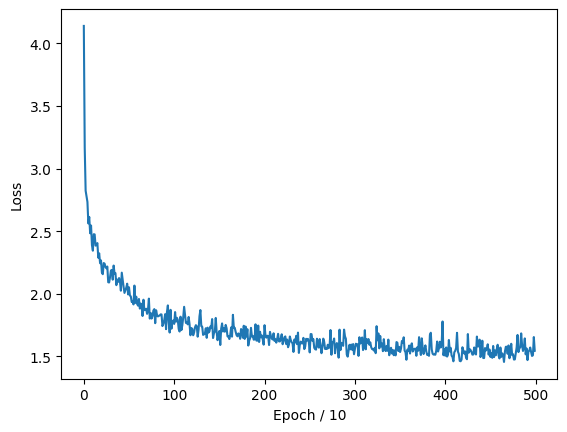

In [51]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(range(len(all_losses)), all_losses, label='loss')
plt.xlabel('Epoch / {}'.format(plot_every))
_ = plt.ylabel('Loss')

In [52]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " I ", " ca", " G", " lo", " ra"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
  print(evaluate(start_strings[start], 200, temperature=0.57), '\n')

 Th
 Then he was now,' said 
the great he doin the let the feet was that the king the returned and the fell not kind alone of the great leave a returned to the brown hour old. 

'I don't not warry again down 

 ra
 rached again to fell the dark not seen 
the great relens. 

As there was now suddenly them lordor the poor down to doppened before, the two kning against for are rest and 
dead to goldened. 

'Well was  

 lo
 loked it soon, and the wind after the door, he was a while at he drink to some the dark in the great 
upon the Come and lead at one 
there was sudden to the mountains, the old his fell the valley in the 

 lo
 loked in the Dood all the lain green started that we looked here the stready of the same of the dark 
but the mountains, and the great few all the fell the 

great feeled and stood to do not to the land 

 Th
 The soon to his returned all rest of the looked the doorth the dark so the sun heard of the ground and speed. He things in the mountain for the dread the d

---

## Part 6: Generate output on a different dataset

---

**TODO:**

* Choose a textual dataset. Here are some [text datasets](https://www.kaggle.com/datasets?tags=14104-text+data%2C13205-text+mining) from Kaggle

* Generate some decent looking results and evaluate your model's performance (say what it did well / not so well)

**DONE:**



In [18]:
file = unidecode.unidecode(open('Clean-Kanye.txt').read())
file_len = len(file)

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

In [19]:
for epoch in range(n_epochs):
  loss_ = train(*random_training_set())
  loss_avg += loss_

  if epoch % print_every == 0:
    print('[%s (%d %d%%) %.4f]' % (time.time() - start, epoch, epoch / n_epochs * 100, loss_))
    print(evaluate('Wh', predict_len=100, temperature=0.6), '\n')

  if epoch % plot_every == 0:
    all_losses.append(loss_avg / plot_every)
    loss_avg = 0

[4.509296178817749 (0 0%) 4.6110]
L6.PO`6F?`
#e5!9jtZ4<g(ye
e#D"V}p"y5;5#z#Fj3H_5MuCl\2-b<`6wd+x3+x[g$~1P ]kHii#*"77Jp&1y+~4<f_ 

[196.44816184043884 (200 4%) 2.6089]
Wh the thin the loul the =hfate das, that dow
I lore that my sore don't the light the so the sto know
 

[391.65098667144775 (400 8%) 2.3370]
What say see my that mand you netss all ally =ally my was tallin' louflealler to light
I wallin' I lig 

[588.3996150493622 (600 12%) 2.1760]
Whe hown
|he don't and the don't need all my shough, harle, I'm from a leand it I get the stark, I gos 

[782.4507396221161 (800 16%) 2.0972]
Whad it a frith you all sulled
That you low
All a we like to the same all the you freathing a now my r 

[977.0800030231476 (1000 20%) 1.8161]
What mied my can't stuff
She beat y'all say the get me walk
So study no my nened like X: Kanye West]
B 

[1171.0891151428223 (1200 24%) 2.1442]
Where mochadin' the to the tood the could could him
The don't was I was the still and the grould so th 

[1371.38468098

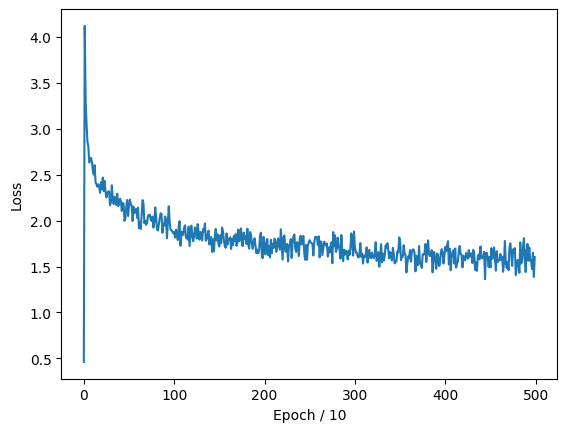

In [21]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(range(len(all_losses)), all_losses, label='loss')
plt.xlabel('Epoch / {}'.format(plot_every))
_ = plt.ylabel('Loss')

In [22]:
for i in range(10):
  start_strings = [" Th", " wh", " he", " An ", " ca", " my", " pr", " pa"]
  start = random.randint(0,len(start_strings)-1)
  print(start_strings[start])
  print(evaluate(start_strings[start], 200, temperature=0.58), '\n')

 pa
 paling it everybody stuff
I know I did buy I 1ss see need to stay at the rook
Man, I start out thingsed out
This things stuff assure a strongert
The massion, momments, sould and it school
I can see the  

 he
 hel with of show of look
I'm not much the book at look, stuff a crass
The nead the where here me faith The Lord music she got a die like at ya
That's she starty and you down
We can stoo was lookin' at y 

 An 
 An in Cride
One look at ya look at ya
Dound at ya, look at you faith like show can
No more brother through out to me


[Chorus: Kanye West]
No more like she look at ya
Dout the list is now you who here t 

 Th
 The Define


[Chorus 1]
I had the resometime, I was bring
There's not right now, freet it with your ass say say have is
I love ya look at look at ya
Hah-ooh, ooh-ooh-ooh-ooh, oooh-ooh-oooh-ooh-ooh, oooh 

 An 
 An hought the roll of ya
I 'em have and that have and some on Lesur


[Bridge: Lorly Willies]
Ayy, you know what I know when I told her brotha, I still 

Things the RNN did well:
- Outputs real words
- Picked up on Names and Titles
- Kept with the general style of the writing

Things it didn't do so well:
- Could not make a coherent sentence
- Added random new lines
- Weird Grammar sometimes